# WCP: OxCGRT simplified EDA

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets cleaning](#datasets_cleaning)
- [Data exporting](#data_exporting)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
What was the policy space available to countries during the Covid-19 pandemic, and how did they use it? Thie notebook explores simplified data published by the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">Oxford Covid-19 Government Response Tracker (OxCGRT)</a> and available from the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">OxCGRT Github repository</a> to start exploring answers to such a large question. Any progress in analysis may mean that larger, more complex, datasets can be used during expanded research at a later date.  
    
The pandemic policy space is assumed to be revealed by the actions of all governments across the world while they were resisting the spread and effects of the disease. The actions of one set of policy makers in one country is taken as evidence that such a course of action was nominally available to all others, with national preferences or impediments restricting adoption worldwide. This is an unusual way to view policy-making, but is perhaps only possible with the pandemic because it created rare conditions for comparisons made at the global level. The utility of this assumption is tested throughout the notebook. 
    
Mapping of the global policy space is undertaken below. After that, it becomes possible to ask many questions about the use of the policy space:
    
- How did policies cluster in their use by governemnts? 
- Did some policy clusters become standard approaches, and which countries diverged from them? 
- Which policies were most preferred? 
- Did some policies become foundational ones that were necessary before others could be initiated? 
- How did use of the policy space change over time?
- How many dimensions in the policy space were there? 
    
These and others are considered below.  
   
</div>

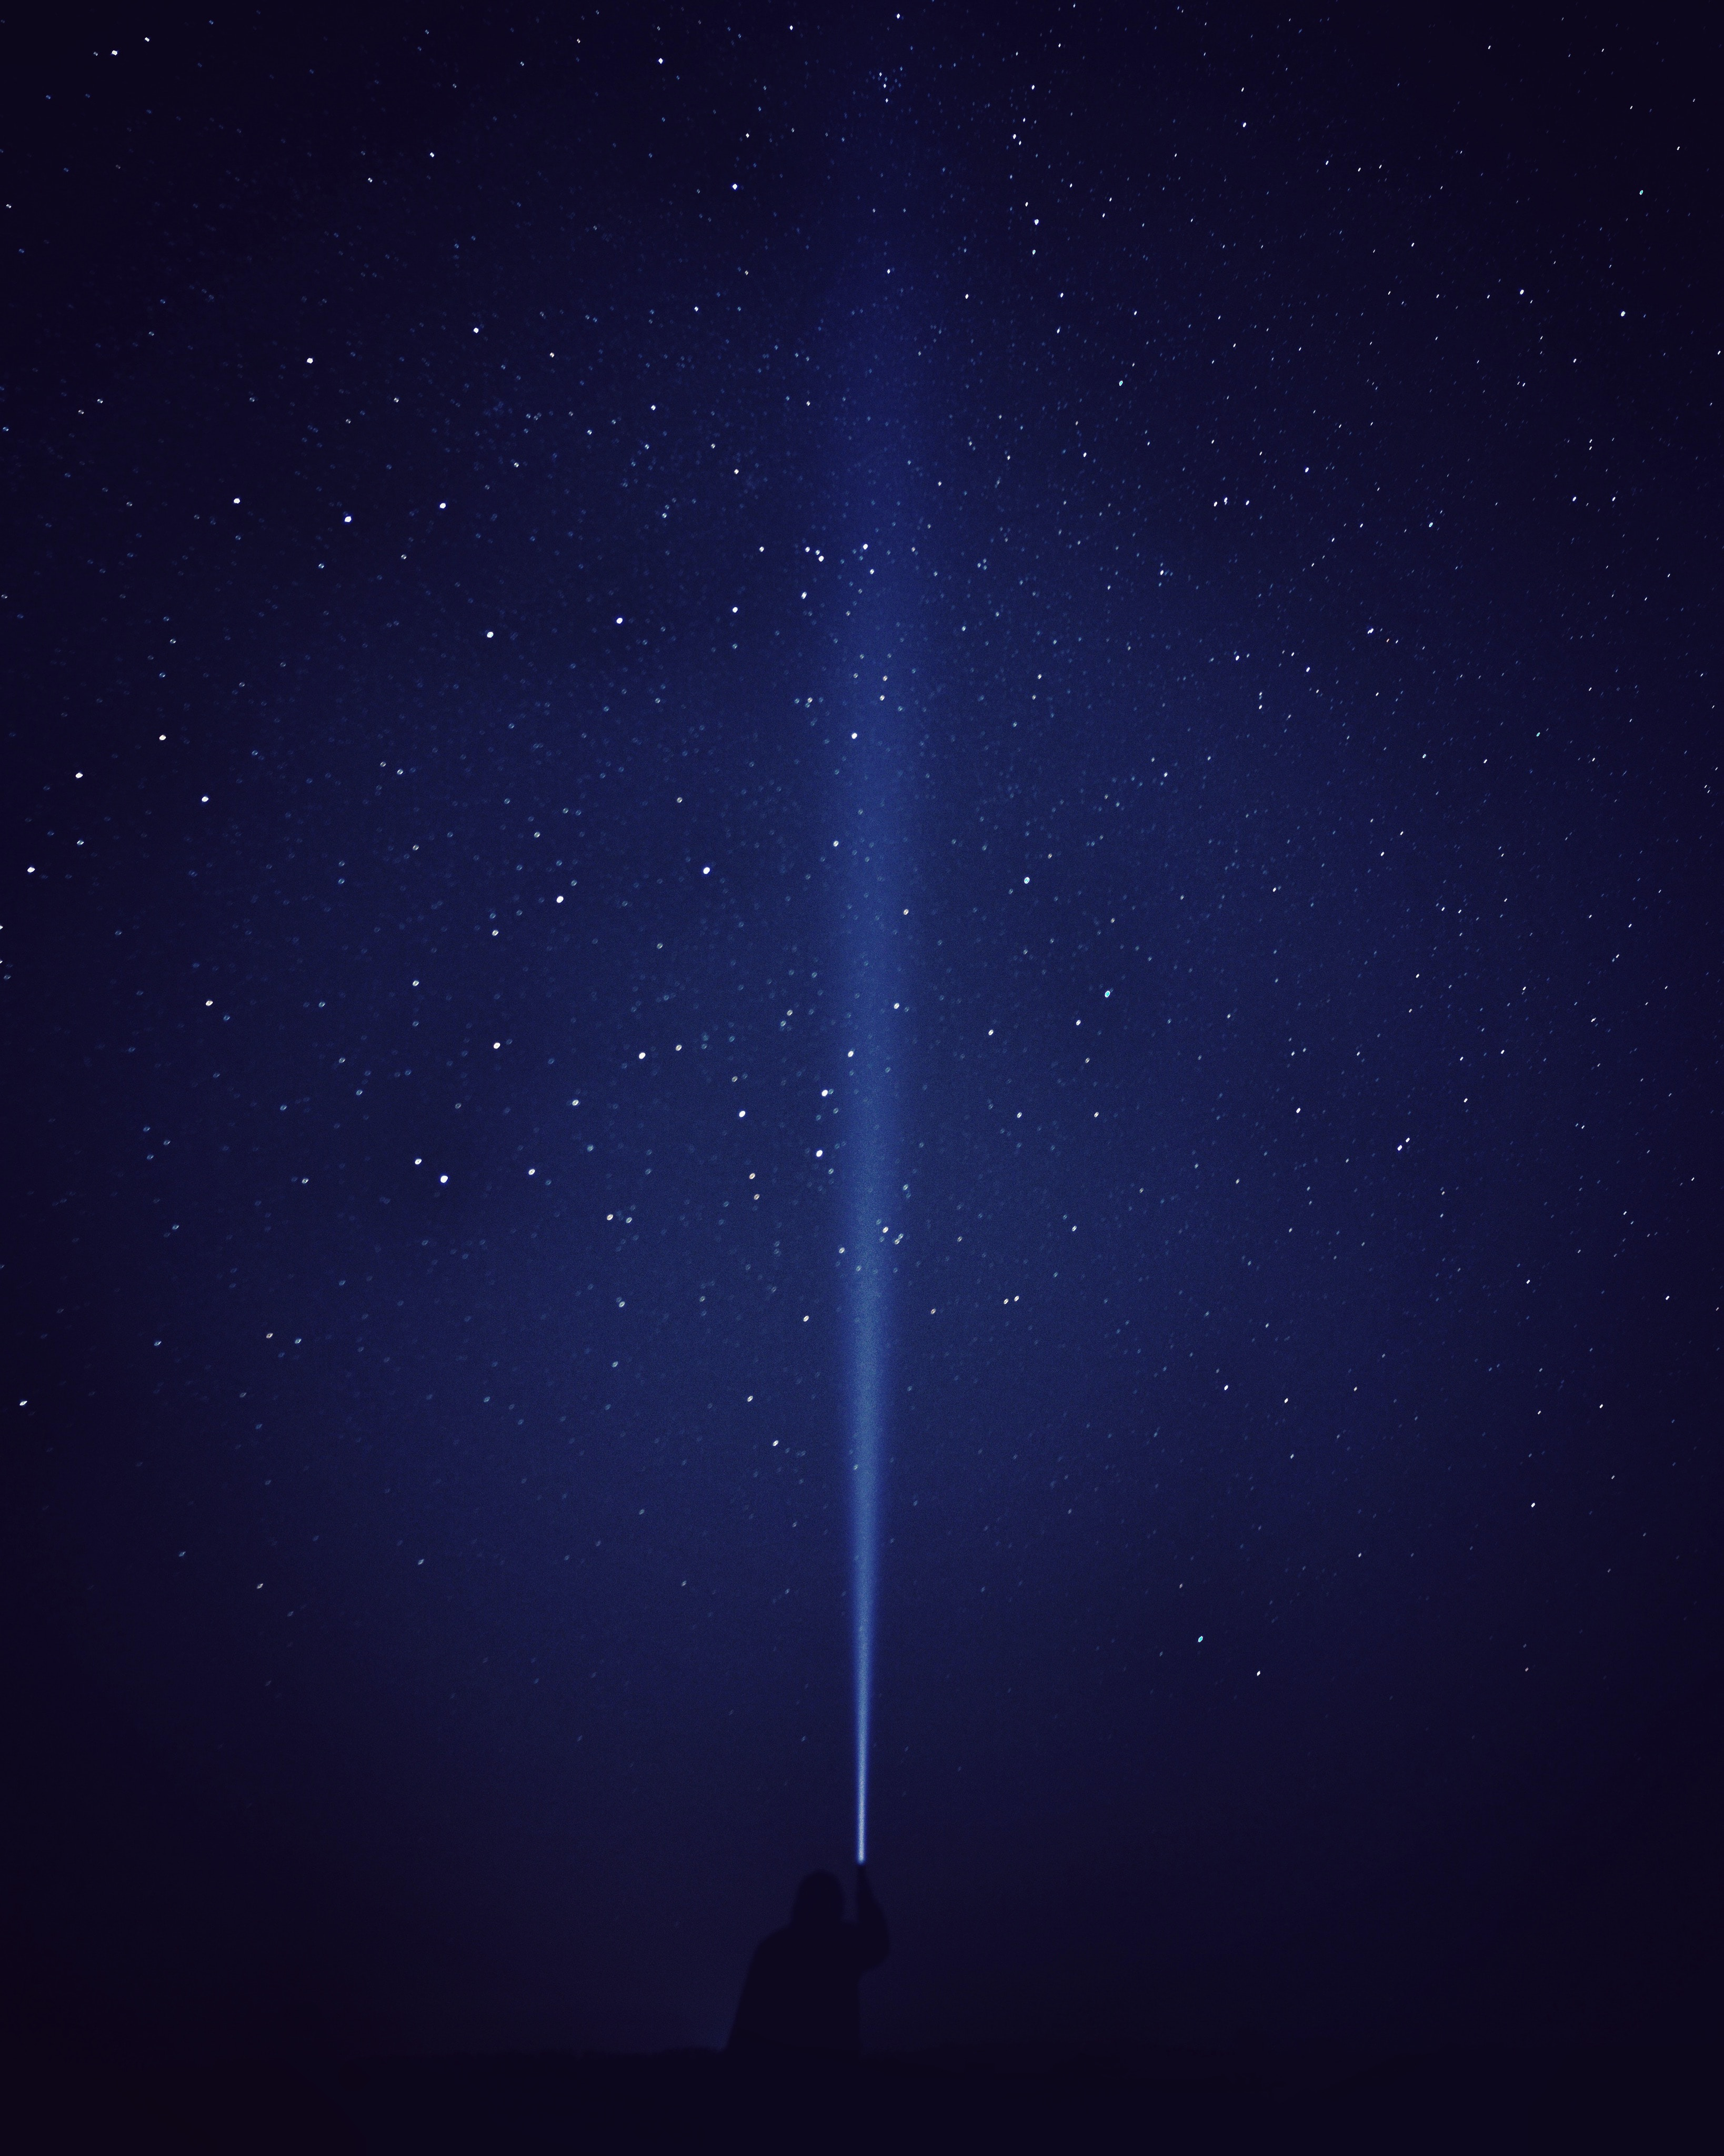

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [12]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports date and time packages for dealing with such
import datetime

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions and settings that are used in the notebook.
</div>

In [13]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [14]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
This notebook uses the simplified covid policy data set that was originally from the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">OxCGRT Github repository</a>, and was cleaned in the <a href="https://github.com/LawrenceKay/worldwide_covid_policy/blob/main/notebooks/WCP_oxcgrt_cleaning.ipynb" target="_blank">OxCGRT cleaning notebook</a>.
    
    
    
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
OxCGRT_simplified_national_clean.csv
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [15]:
# Imports the dataset
oxcgrt_simple = pd.read_csv('~/css/projects/wcp/data/OxCGRT_simplified_national_clean.csv', on_bad_lines='skip', low_memory=False, index_col=0)

### Data checking
<a id='data_checking'></a>

In [16]:
# Runs basic EDA checks on the data
EDA_checks(oxcgrt_simple)

ROW LABELS

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            390899, 390900, 390901, 390902, 390903, 390904, 390905, 390906,
            390907, 390908],
           dtype='int64', length=202760)

COLUMN NAMES

Index(['CountryName', 'CountryCode', 'Date', 'C1M_combined_numeric',
       'C1M_combined', 'C2M_combined_numeric', 'C2M_combined',
       'C3M_combined_numeric', 'C3M_combined', 'C4M_combined_numeric',
       'C4M_combined', 'C5M_combined_numeric', 'C5M_combined',
       'C6M_combined_numeric', 'C6M_combined', 'C7M_combined_numeric',
       'C7M_combined', 'C8EV_combined_numeric', 'C8EV_combined',
       'E1_combined_numeric', 'E1_combined', 'E2_combined_numeric',
       'E2_combined', 'H1_combined_numeric', 'H1_combined',
       'H2_combined_numeric', 'H2_combined', 'H3_combined_numeric',
       'H3_combined', 'H6M_combined_numeric', 'H6M_combined',
       'H7_combined_numeric', 'H7_combined', 'H

       CountryName CountryCode          Date  C1M_combined_numeric  \
count       202760      202760  2.027600e+05         202760.000000   
unique         185         185           NaN                   NaN   
top          Aruba         ABW           NaN                   NaN   
freq          1096        1096           NaN                   NaN   
mean           NaN         NaN  2.021066e+07              1.141095   
std            NaN         NaN  8.174621e+03              1.097689   
min            NaN         NaN  2.020010e+07              0.000000   
25%            NaN         NaN  2.020098e+07              0.000000   
50%            NaN         NaN  2.021070e+07              1.000000   
75%            NaN         NaN  2.022040e+07              2.000000   
max            NaN         NaN  2.022123e+07              3.000000   

       C1M_combined  C2M_combined_numeric C2M_combined  C3M_combined_numeric  \
count        202760         202760.000000       202760         202760.000000   

In [17]:
# Checks for missing data and duplicated rows in the data
missing_and_duplicated(oxcgrt_simple)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,C4M_combined_numeric,...,H7_combined,H8M_combined_numeric,H8M_combined,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex


NULLS

There are 0 null values in the dataset.

The null values are in the following columns:


CountryName                        0
CountryCode                        0
Date                               0
C1M_combined_numeric               0
C1M_combined                       0
C2M_combined_numeric               0
C2M_combined                       0
C3M_combined_numeric               0
C3M_combined                       0
C4M_combined_numeric               0
C4M_combined                       0
C5M_combined_numeric               0
C5M_combined                       0
C6M_combined_numeric               0
C6M_combined                       0
C7M_combined_numeric               0
C7M_combined                       0
C8EV_combined_numeric              0
C8EV_combined                      0
E1_combined_numeric                0
E1_combined                        0
E2_combined_numeric                0
E2_combined                        0
H1_combined_numeric                0
H1_combined                        0
H2_combined_numeric                0
H2_combined                        0
H


The null values above account for the following percentages of all null values:


CountryName                        0.0
CountryCode                        0.0
Date                               0.0
C1M_combined_numeric               0.0
C1M_combined                       0.0
C2M_combined_numeric               0.0
C2M_combined                       0.0
C3M_combined_numeric               0.0
C3M_combined                       0.0
C4M_combined_numeric               0.0
C4M_combined                       0.0
C5M_combined_numeric               0.0
C5M_combined                       0.0
C6M_combined_numeric               0.0
C6M_combined                       0.0
C7M_combined_numeric               0.0
C7M_combined                       0.0
C8EV_combined_numeric              0.0
C8EV_combined                      0.0
E1_combined_numeric                0.0
E1_combined                        0.0
E2_combined_numeric                0.0
E2_combined                        0.0
H1_combined_numeric                0.0
H1_combined                        0.0
H2_combined_numeric      

<div class="alert-info">
The data was cleaned previously so has no missing data or missing rows. 
</div>

## Data exploration
<a id='data_exploration'></a>

In [18]:
oxcgrt_simple

,CountryName,CountryCode,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,C4M_combined_numeric,...,H7_combined,H8M_combined_numeric,H8M_combined,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,20200101,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0,0,0,0.00,0.00,0.00,0.0
1,Aruba,ABW,20200102,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0,0,0,0.00,0.00,0.00,0.0
2,Aruba,ABW,20200103,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0,0,0,0.00,0.00,0.00,0.0
3,Aruba,ABW,20200104,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0,0,0,0.00,0.00,0.00,0.0
4,Aruba,ABW,20200105,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0,0,0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390904,Zimbabwe,ZWE,20221227,1.0,1G,2.0,2G,1.0,1G,0.0,...,5G,0.0,0,2,3,5,29.48,36.44,41.65,0.0
390905,Zimbabwe,ZWE,20221228,1.0,1G,2.0,2G,1.0,1G,0.0,...,5G,0.0,0,2,3,5,29.48,36.44,41.65,0.0
390906,Zimbabwe,ZWE,20221229,1.0,1G,2.0,2G,1.0,1G,0.0,...,5G,0.0,0,2,3,5,29.48,36.44,41.65,0.0
390907,Zimbabwe,ZWE,20221230,1.0,1G,2.0,2G,1.0,1G,0.0,...,5G,0.0,0,2,3,5,29.48,36.44,41.65,0.0


## Data exporting
<a id='data_exporting'></a>

<div class="alert-info">
Exporting the clean versions of respective datasets. 
</div>

## Conclusion
<a id='conclusion'></a>

<div class="alert-info">
[Insert]
   
</div>